<a href="https://colab.research.google.com/github/SharoonSharif/Electrical-Fault-Detection-CLassification/blob/main/Electrical_Fault_detection_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'electrical-fault-detection-and-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1358964%2F2258354%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241009%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241009T214107Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D45945e946a022afecb34ce7b0572b3938bb81c06f51f59f1572f9cf9f33d45feddb7a21babd5d505790e798bf04908e7984e67abf6cd7b6ffd6a2459db2815ca0acf75092e801aa36e5940186e966a1c8705eb50239de356a9f106d86a42c1485b18a5a8e64965f29e6adba88f4c55b617eab7fbe59be9b944c5ac77b46fa748f6f4afdf9aa2b1a0e71444eb9def862e78c996dd154f6a1b199ac5764776877ef2cf9d12daa5151041199d558e82b50b2843a4cb4eab3510202dfa70098bee4507a0322721efac8609600ee8d5178b76fa8eb7207b4cdfb58d695e80d79d878953d55cf403772f45de1f64a901d017ae6e0581316da8a89762214c5034a655ab'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 704230 bytes downloaded
Downloaded and uncompressed: electrical-fault-detection-and-classification
Data source import complete.


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/electrical-fault-detection-and-classification/detect_dataset.csv
/kaggle/input/electrical-fault-detection-and-classification/classData.csv


## Importing libararies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

## loading Data

In [ ]:
df = pd.read_csv('/kaggle/input/electrical-fault-detection-and-classification/detect_dataset.csv')

In [ ]:
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [ ]:
df.shape

(12001, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [ ]:
df.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.0,0.0
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,NaN,NaN
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,NaN,NaN
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709,NaN,NaN
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,NaN,NaN
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,NaN,NaN
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,NaN,NaN
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,NaN,NaN


## Data Cleaning

In [ ]:
df.isnull().sum()

,0
Output (S),0
Ia,0
Ib,0
Ic,0
Va,0
Vb,0
Vc,0
Unnamed: 7,12001
Unnamed: 8,12001


**Unnamed: 7 , Unnamed: 8 are completly filled with null values**

In [ ]:
df.drop(['Unnamed: 7','Unnamed: 8'],axis=1,inplace = True)

In [ ]:
df.duplicated().sum()

0

**No duplicate rows in the dataset**

## EDA

In [ ]:
df['Output (S)'].unique()

array([0, 1])

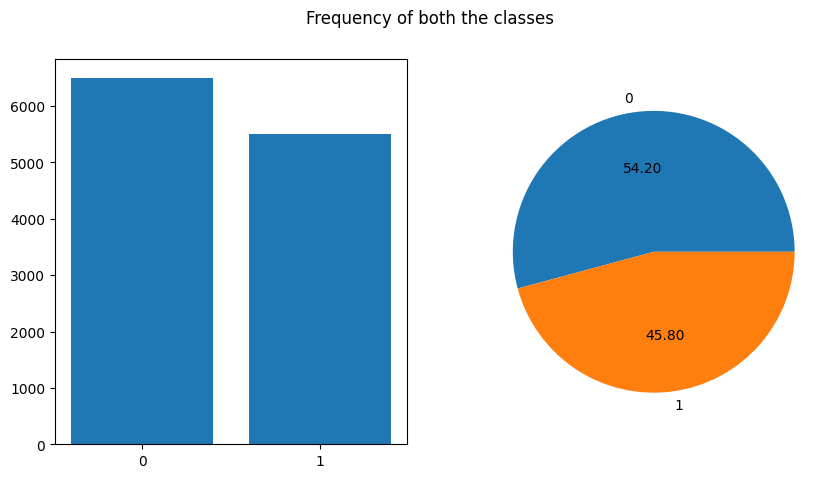

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.bar(x=df['Output (S)'].unique(),height = df['Output (S)'].value_counts())
ax1.set_xticks(ticks=[0,1])

ax2.pie(df['Output (S)'].value_counts(),autopct='%0.2f',labels=df['Output (S)'].value_counts().index)

plt.suptitle('Frequency of both the classes')
plt.show()

**0 (no fault) class appear more in the dataset**

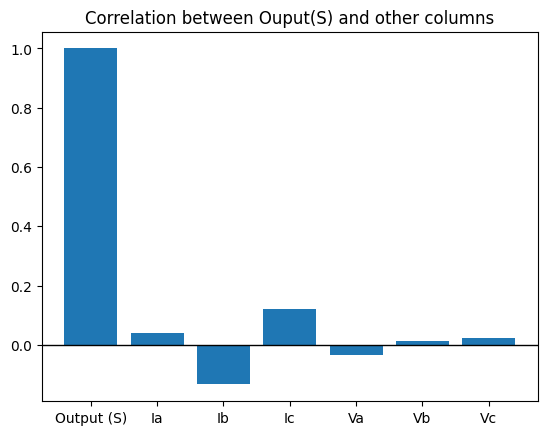

In [ ]:
plt.bar(x = df.columns , height = df.corr()['Output (S)'])
plt.axhline(y=0, color='black', linewidth=1)
plt.title('Correlation between Ouput(S) and other columns')
plt.show()

**la , lb and lc peak around 0 only** <br>
**Va , Vb and Vc peak around 0 and also have more spreaded distiribution**

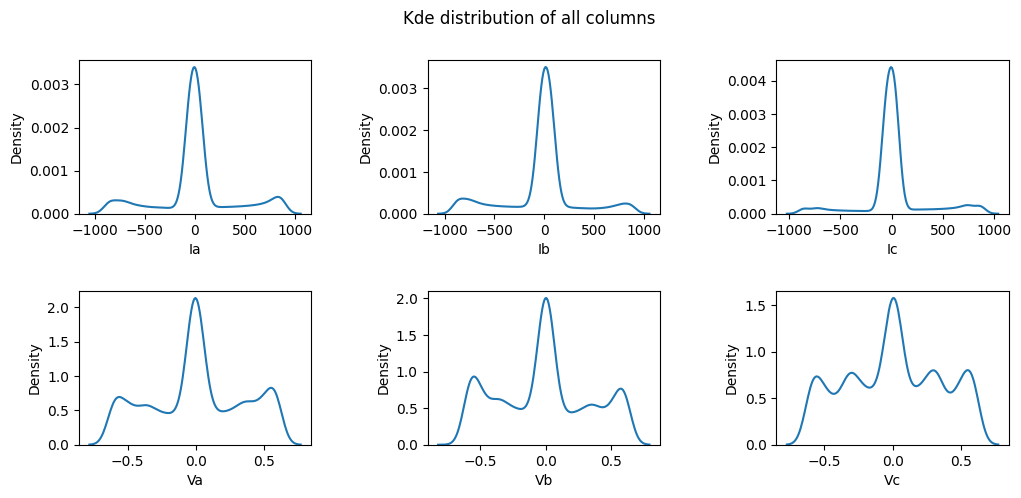

In [ ]:
ls = ['Ia','Ib','Ic','Va','Vb','Vc']

plt.figure(figsize=(12, 5))
for i in range(2):
    for j in range(3):
        plt.subplot(2, 3, i * 3 + (j + 1))
        sns.kdeplot(df[ls[i * 3 + j]])

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Kde distribution of all columns')
plt.show()

**all distribution peak around 0**<br>
**Va, Vb, Vc also peak around 0.5 and -0.5**

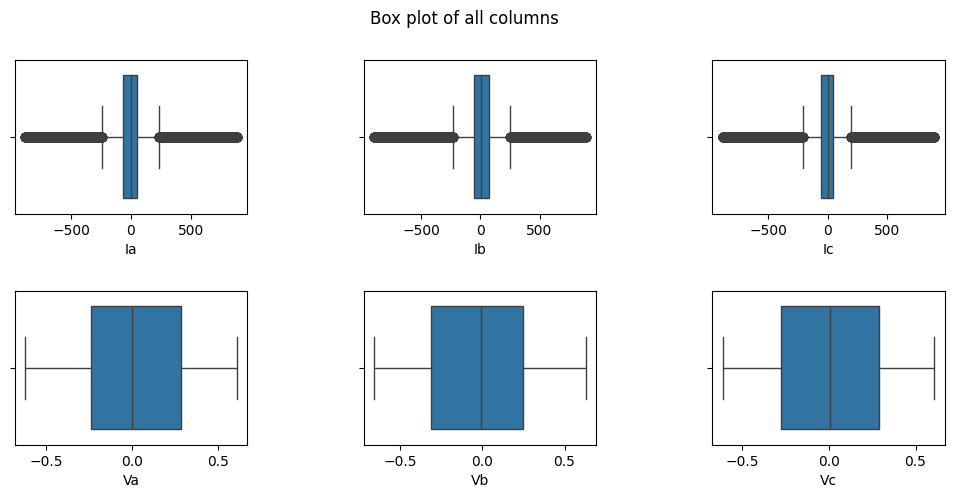

In [ ]:
ls = ['Ia','Ib','Ic','Va','Vb','Vc']

plt.figure(figsize=(12, 5))
for i in range(2):
    for j in range(3):
        plt.subplot(2, 3, i * 3 + (j + 1))
        sns.boxplot(x=df[ls[i*3+j]])

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Box plot of all columns')
plt.show()

**la , lb, and lc have a very little spread and quite a lot of outliers**<br>
**Va , Vb and Vc have more spread and no outliers**

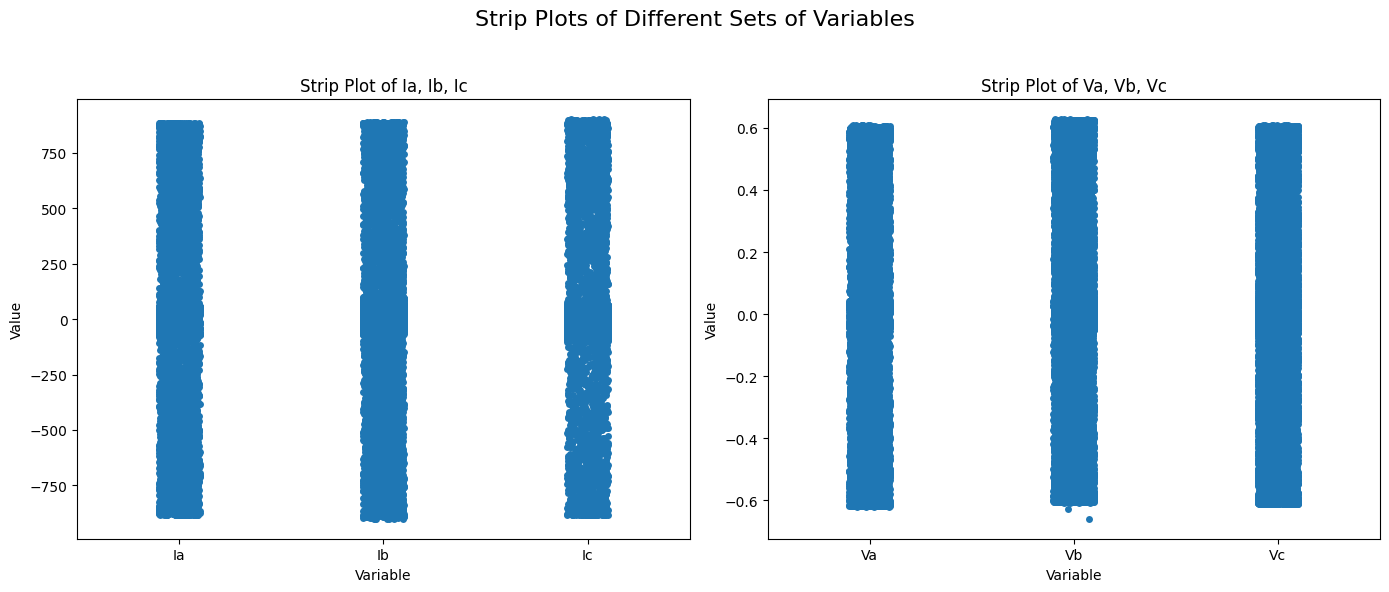

In [ ]:
ls = ['Ia','Ib','Ic','Va','Vb','Vc']

df_melted1 = df[ls[:3]].melt(var_name='Variable', value_name='Value')
df_melted2 = df[ls[3:]].melt(var_name='Variable', value_name='Value')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.stripplot(x='Variable', y='Value', data=df_melted1, ax=ax1)
ax1.set_title('Strip Plot of Ia, Ib, Ic')

sns.stripplot(x='Variable', y='Value', data=df_melted2, ax=ax2)
ax2.set_title('Strip Plot of Va, Vb, Vc')

fig.suptitle('Strip Plots of Different Sets of Variables', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to include the overall title
plt.show()

**Shows distribution of values**

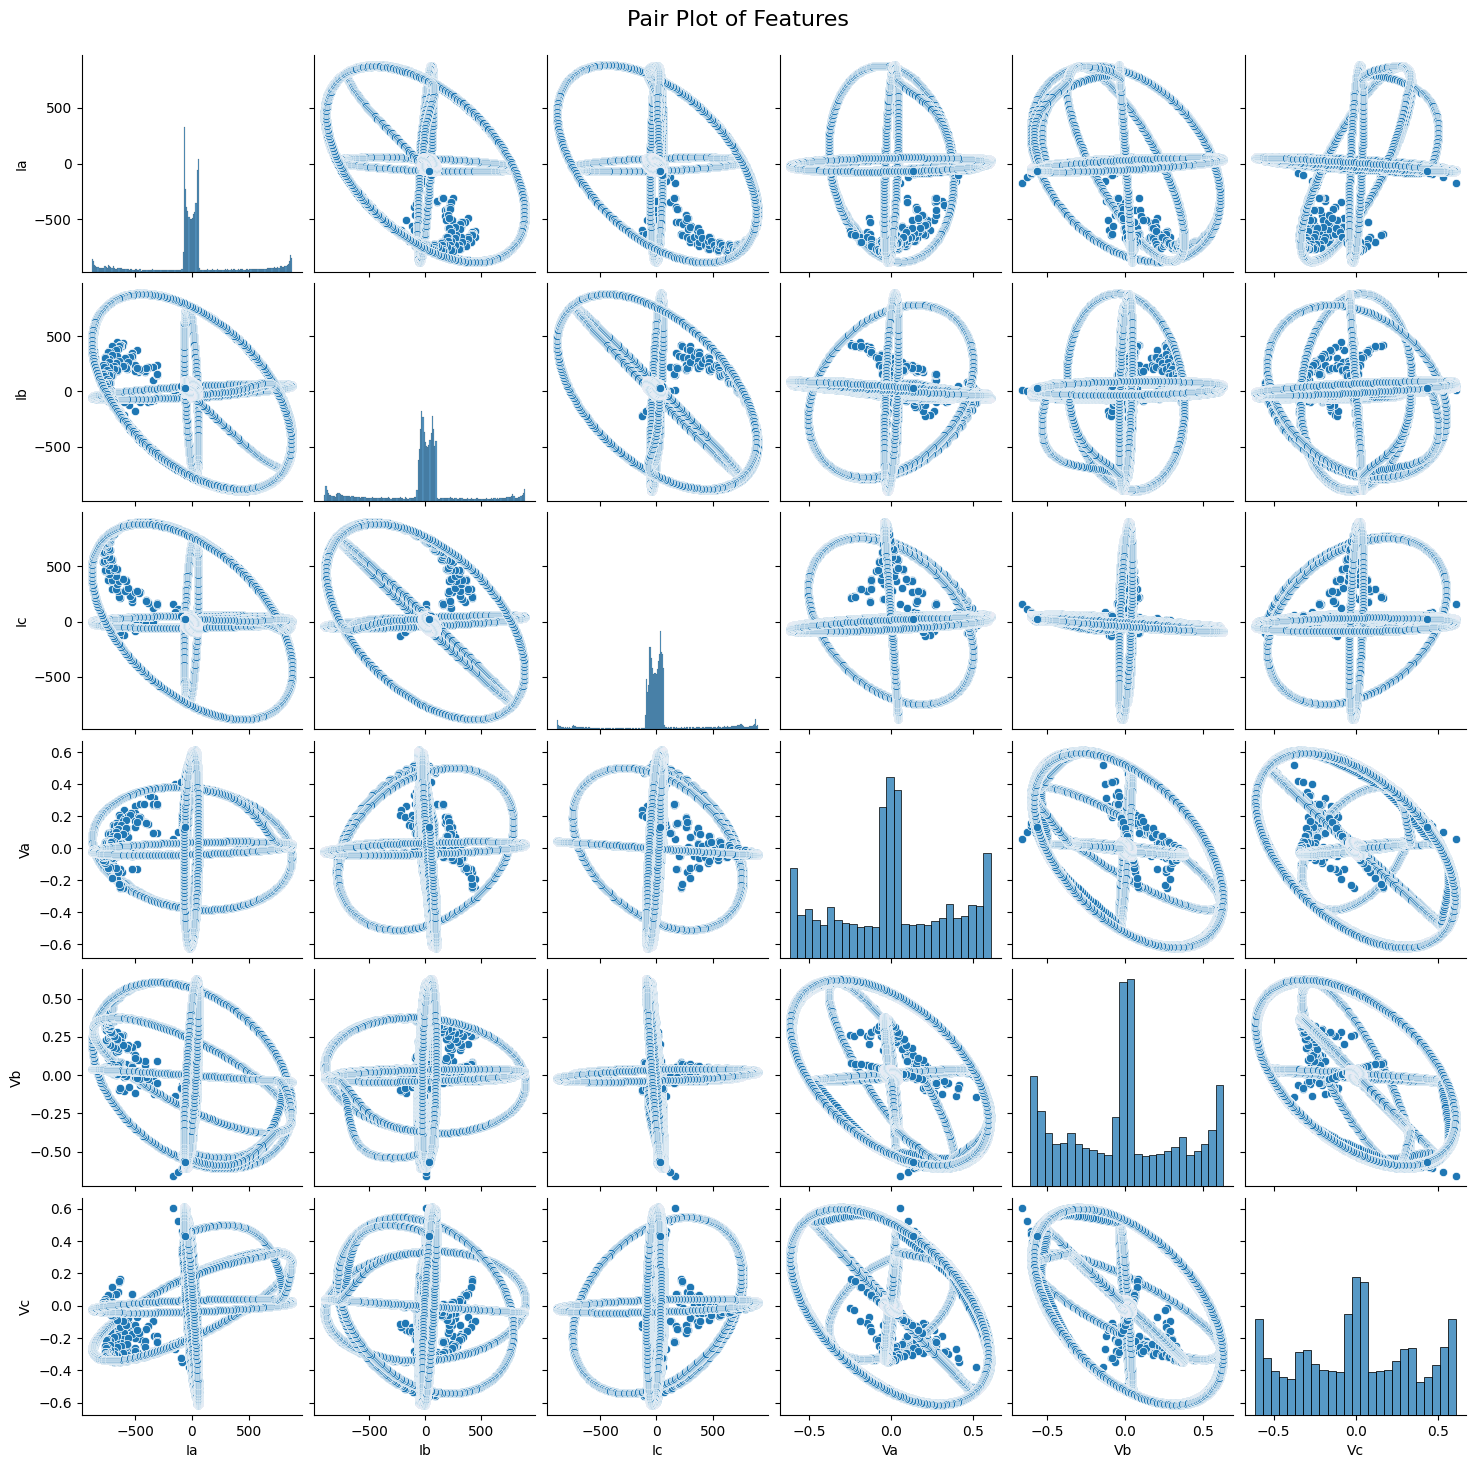

In [ ]:
pair_plot = sns.pairplot(data=df.drop('Output (S)', axis=1))
pair_plot.fig.suptitle('Pair Plot of Features', fontsize=16)
pair_plot.fig.subplots_adjust(top=0.95)

plt.show()

**shows scatter plot among each column**

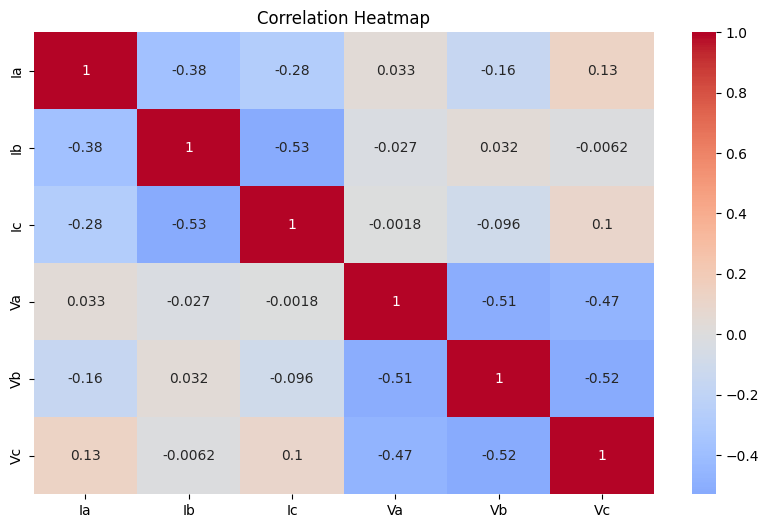

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('Output (S)',axis=1).corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


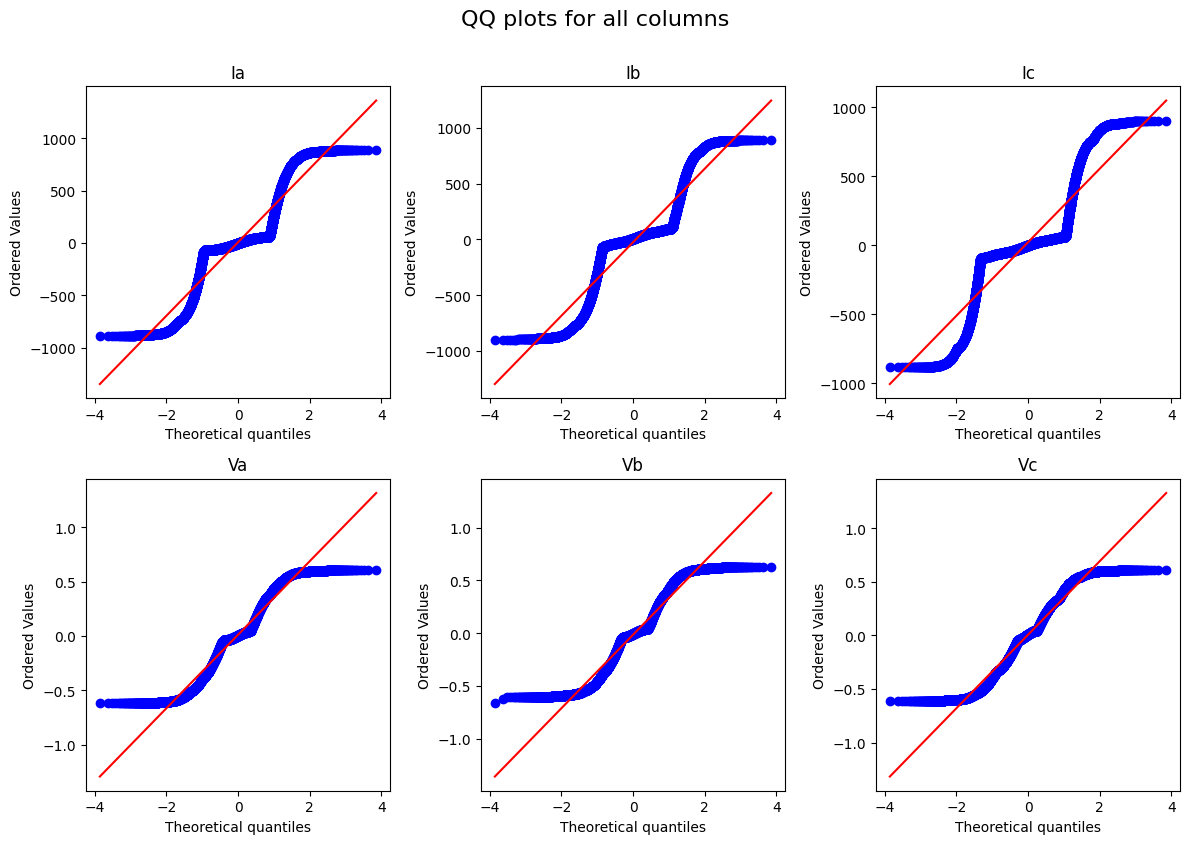

In [ ]:
ls = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

plt.figure(figsize=(12, 8))

for i in range(2):
    for j in range(3):
        plt.subplot(2, 3, i * 3 + (j + 1))
        stats.probplot(df[ls[i*3+j]], dist="norm", plot=plt)
        plt.title(ls[i*3+j])

plt.tight_layout()
plt.suptitle('QQ plots for all columns', y=1.05, fontsize=16)
plt.show()


**Values of each column are somewhat normally distributed**

## Train Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Output (S)',axis=1),df['Output (S)'],random_state=42,test_size=0.2)

## Scaling

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Model Training

In [ ]:
em = pd.DataFrame(columns=['model_name','accuracy','precision','recall'])

### LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
em.loc[em.shape[0]] = ['LogisticRegression',accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred)]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.81      1306
           1       1.00      0.42      0.60      1095

    accuracy                           0.74      2401
   macro avg       0.84      0.71      0.70      2401
weighted avg       0.82      0.74      0.71      2401



### DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
em.loc[em.shape[0]] = ['DecisionTreeClassifier',accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred)]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1306
           1       0.99      1.00      0.99      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



### SVC

In [ ]:
sv = SVC()
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
em.loc[em.shape[0]] = ['SVC',accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred)]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1306
           1       1.00      0.97      0.98      1095

    accuracy                           0.98      2401
   macro avg       0.99      0.98      0.98      2401
weighted avg       0.98      0.98      0.98      2401



### KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
em.loc[em.shape[0]] = ['KNeighborsClassifier',accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred)]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



### RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
em.loc[em.shape[0]] = ['RandomForestClassifier',accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred)]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



### BaggingClassifier

In [ ]:
bgc = BaggingClassifier()
bgc.fit(x_train,y_train)
y_pred = bgc.predict(x_test)
em.loc[em.shape[0]] = ['BaggingClassifier',accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred)]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



### AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred = abc.predict(x_test)
em.loc[em.shape[0]] = ['AdaBoostClassifier',accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred)]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



### GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)
em.loc[em.shape[0]] = ['GradientBoostingClassifier',accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred)]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      0.99      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



In [ ]:
em

**all models are performing really well**<br>
**choosing RandomForest for confusion matrix though any of them can be choosen for the task**

In [ ]:
# plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## ANN

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [ ]:
model = Sequential([
    Dense(256,'relu',input_dim=x_train.shape[1]),
    Dropout(0.5),
    Dense(128,'relu'),
    Dropout(0.5),
    Dense(1,'sigmoid'),
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs=10)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8630 - loss: 0.3335 - val_accuracy: 0.9867 - val_loss: 0.0435
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9847 - loss: 0.0532 - val_accuracy: 0.9888 - val_loss: 0.0344
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9864 - loss: 0.0458 - val_accuracy: 0.9908 - val_loss: 0.0317
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9867 - loss: 0.0458 - val_accuracy: 0.9917 - val_loss: 0.0293
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0397 - val_accuracy: 0.9917 - val_loss: 0.0284
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9913 - loss: 0.0302 - val_accuracy: 0.9925 - val_loss: 0.0267
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - loss: 0.0338 - val_accuracy: 0.9929 - val_loss: 0.0243
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9908 - loss: 0.0309 - val_accuracy: 0.

**ANN is also performing well and might perform even better with some tweking**

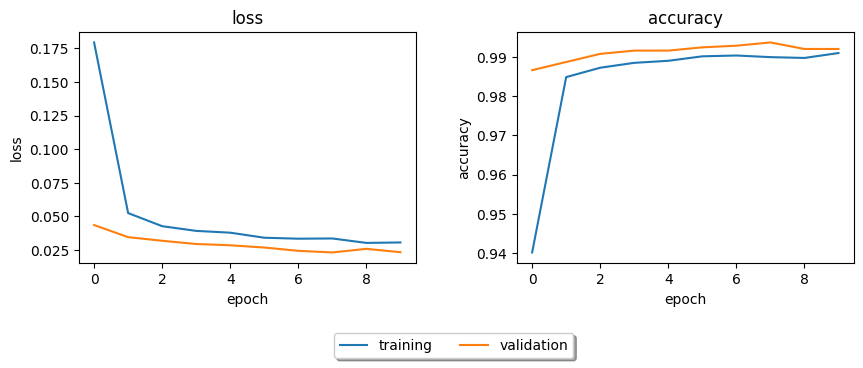

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
ax1.plot(history.history['loss'],label='training')
ax1.plot(history.history['val_loss'],label='validation')
ax1.set_title('loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('accuracy')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')

plt.subplots_adjust(wspace=0.3)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
plt.show()